# **Predicting Wine Quality: A Classification Problem**
### DSCI 100 001: Group 123 (December 2022)

## Introduction

Winemaking is the production of wine, starting with the selection of the fruit, its fermentation into alcohol, and the bottling of the finished liquid. The history of wine-making stretches over a millennia. Winemaking can be divided into two general categories: still wine production (without carbonation) and sparkling wine production (with carbonation–natural or injected). The other major kinds of wine are red wine, white wine, and rosé. There are many factors that contribute to wine quality, such as climate and weather, temperature and sunlight and so on, though to be specific, wine quality relies on the vinification process of wine making and the geographical origin of the grapes but also highly relies on the varietal composition of the grape; for this reason, wine traceability is important for quality control purposes and is also used by the consumer to gather information about the wine (JJ Buckley Fine Wines, 2004).

In our project, we are trying to predict the quality of white wine. In terms of the database, we are using a collection from UCI Machine Learning Repository, which models wine quality based on physicochemical tests.

<img src='https://www.italianowine.com/copia/wp-content/uploads/2018/09/Composizione-vino-EN.jpg' width='400'>

Source: https://www.italianowine.com/en/technology/wine-composition/

## Methods

From our dataset, we use fixed_acid, sugar, alcohol, and pH as exploratory variables and quality as the response variable. The thing we wish to see is if we can predict the quality of white wine using 4 predictors, which are fixed-acid, sugar, alcohol, and pH. From the dataset, we can see that the quality levels, including ‘Average’, ‘Bad’, and ‘Good’ are shown under the quality column. Each of them represents a quality level of the white wine. Other variables from the dataset do not seem to be related to the determinants of wine quality. 

The variables/columns we will use are:
   ##### **fixed_acid: Fixed acidity in white wine**
   ##### **sugar: Sugar content in white wine (grams)**
   ##### **alcohol: Alcohol content in white wine (% alcohol content)**
   ##### **pH: PH value of white wine**
   ##### **quality: Quality level of white wine**


We chose to conduct our data analysis via classification using the K-nearest neighbours technique because the result variable Quality is a categorical variable. Using this method, we predict Quality for white wine based on the value of predictors in the provided training set. To do this, we use two predictors in a single model. alcohol and sugar Data preprocessing, data splitting into training and testing sets, data standardisation, creation of the KNN model and recipe with predetermined predictors, workflow compilation to fit, and risk score prediction are all steps in the process. To assess the accuracy and fine-tune the classifier to choose the ideal value of K, we cross-validate. We train the classifier using the K value that we determined to be the most effective via cross-validation.

To begin, we load the required packages, such as tidyverse and tidymodels, to carry out functions in Jupyter and R. From there, we use these two tools to complete our data analysis. The data set is then loaded from the web source by publishing it to Github and reading its data using read csv(). The seed is then established for reproducibility. In order to complete our analysis, we need a training and testing data set to create our classifier and assess how it performs on testing data that is independent of it. In order to clean the irrelevant variables from our data, we factor in fixed acidity, residual sugar, alcohol, and ph as our variables.


In [1]:
library(tidyverse)
library(plyr)
library(tidymodels)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact


── Attaching packages ────────────

#### Table 1: Loading data from the web

In [2]:
set.seed(4321)
download.file("https://raw.githubusercontent.com/RegalSword/DSCI-Group-123-Project/main/winequality-white.csv",
              destfile = "winequality-white.csv") 

whitewine_df <- read_delim(file = "winequality-white.csv", delim = ";") %>%
         cbind(wine_type = "White") %>%  # combining red and white wine data
         rename(c("fixed acidity" = "fixed_acid", # changing column names to make it easier for selecting and cleaing data
                  "volatile acidity" = "volatile_acid",
                  "citric acid" = "citric_acid",
                  "total sulfur dioxide" = "total_SO2",
                  "residual sugar" = "sugar")) # adding column to distinguish white wine and its components

whitewine_df$quality[whitewine_df$quality == 0] <- "Bad"
whitewine_df$quality[whitewine_df$quality == 1] <- "Bad"
whitewine_df$quality[whitewine_df$quality == 2] <- "Bad"
whitewine_df$quality[whitewine_df$quality == 3] <- "Bad"
whitewine_df$quality[whitewine_df$quality == 4] <- "Bad"
whitewine_df$quality[whitewine_df$quality == 5] <- "Bad"
whitewine_df$quality[whitewine_df$quality == 6] <- "Average"
whitewine_df$quality[whitewine_df$quality == 7] <- "Good"
whitewine_df$quality[whitewine_df$quality == 8] <- "Good"
whitewine_df$quality[whitewine_df$quality == 9] <- "Good"
whitewine_df$quality[whitewine_df$quality == 10] <- "Good"

head(whitewine_df) # Demonstrates that the dataset can be read from the web into R

Rows: 4898 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,fixed_acid,volatile_acid,citric_acid,sugar,chlorides,free sulfur dioxide,total_SO2,density,pH,sulphates,alcohol,quality,wine_type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,Average,White
2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,Average,White
3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,Average,White
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,Average,White
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,Average,White
6,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,Average,White


#### Table 2 and 3: Preliminary exploratory data analysis

In [11]:
quality_variables <- select(whitewine_df,
                         fixed_acid,
                         sugar,
                         alcohol,
                         pH,
                         quality) %>%
                  mutate(quality = as_factor(quality))

head(quality_variables) # Clean data in a tidy format using only training data

wine_split <- initial_split(quality_variables, prop = 0.80, quality = Class)
wine_train <- training(wine_split)  # training dataframe
wine_test <- testing(wine_split)  # testing dataframe

glimpse(wine_train)
glimpse(wine_test)

quality_variables %>% 
    pull(quality) %>%
    levels() # Outputs total number of categories (dependent variables)

# Exploratory data analysis:
wine_summary <- nrow(quality_variables) 
        quality_variables %>%
        group_by(quality) %>%
        dplyr::summarize(count = n(), # Total number of observations in each class 
                         wine_proportion = n() / wine_summary * 100, # The percentage of each class indicating the proportion relative to the dataset
                         mean_fixed_acid = mean(fixed_acid),
                         sugar = mean(sugar),
                         alcohol = mean(alcohol),
                         pH = mean(pH))

,fixed_acid,sugar,alcohol,pH,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,7.0,20.7,8.8,3.00,Average
2,6.3,1.6,9.5,3.30,Average
3,8.1,6.9,10.1,3.26,Average
4,7.2,8.5,9.9,3.19,Average
5,7.2,8.5,9.9,3.19,Average
6,8.1,6.9,10.1,3.26,Average


Rows: 3,918
Columns: 5
$ fixed_acid <dbl> 6.2, 8.4, 6.1, 6.1, 9.1, 9.8, 6.7, 6.9, 8.5, 7.3, 6.4, 6.8,…
$ sugar      <dbl> 6.50, 12.15, 4.00, 10.50, 2.00, 15.40, 12.10, 6.50, 8.80, 5…
$ alcohol    <dbl> 9.9, 10.8, 11.6, 10.5, 10.1, 9.5, 8.9, 10.5, 10.5, 13.2, 11…
$ pH         <dbl> 3.22, 2.99, 3.37, 3.14, 3.15, 3.18, 3.04, 3.10, 2.88, 2.84,…
$ quality    <fct> Average, Average, Average, Bad, Bad, Bad, Average, Bad, Bad…
Rows: 980
Columns: 5
$ fixed_acid <dbl> 6.2, 6.2, 6.9, 7.4, 6.2, 6.5, 6.7, 7.4, 6.2, 7.0, 7.2, 6.4,…
$ sugar      <dbl> 7.00, 1.20, 1.00, 2.05, 1.50, 5.40, 2.50, 1.40, 4.40, 7.40,…
$ alcohol    <dbl> 9.6, 12.8, 10.0, 10.8, 9.0, 10.0, 9.4, 10.0, 9.8, 9.8, 11.7…
$ pH         <dbl> 3.18, 3.33, 3.45, 3.19, 3.42, 3.24, 3.11, 3.16, 3.25, 3.13,…
$ quality    <fct> Average, Good, Average, Average, Average, Bad, Average, Goo…


[1] "Average" "Bad"     "Good"

quality,count,wine_proportion,mean_fixed_acid,sugar,alcohol,pH
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Average,2198,44.87546,6.837671,6.441606,10.57537,3.188599
Bad,1640,33.48305,6.961524,7.054451,9.84953,3.170457
Good,1060,21.64149,6.725142,5.261509,11.41602,3.215132


Examining the training data, we calculate the the proportions of each variable of interest in each classification group by dividing by the total number of observations.

#### Scatter plots to visualize the relationship between the perimeter and concavity variables.

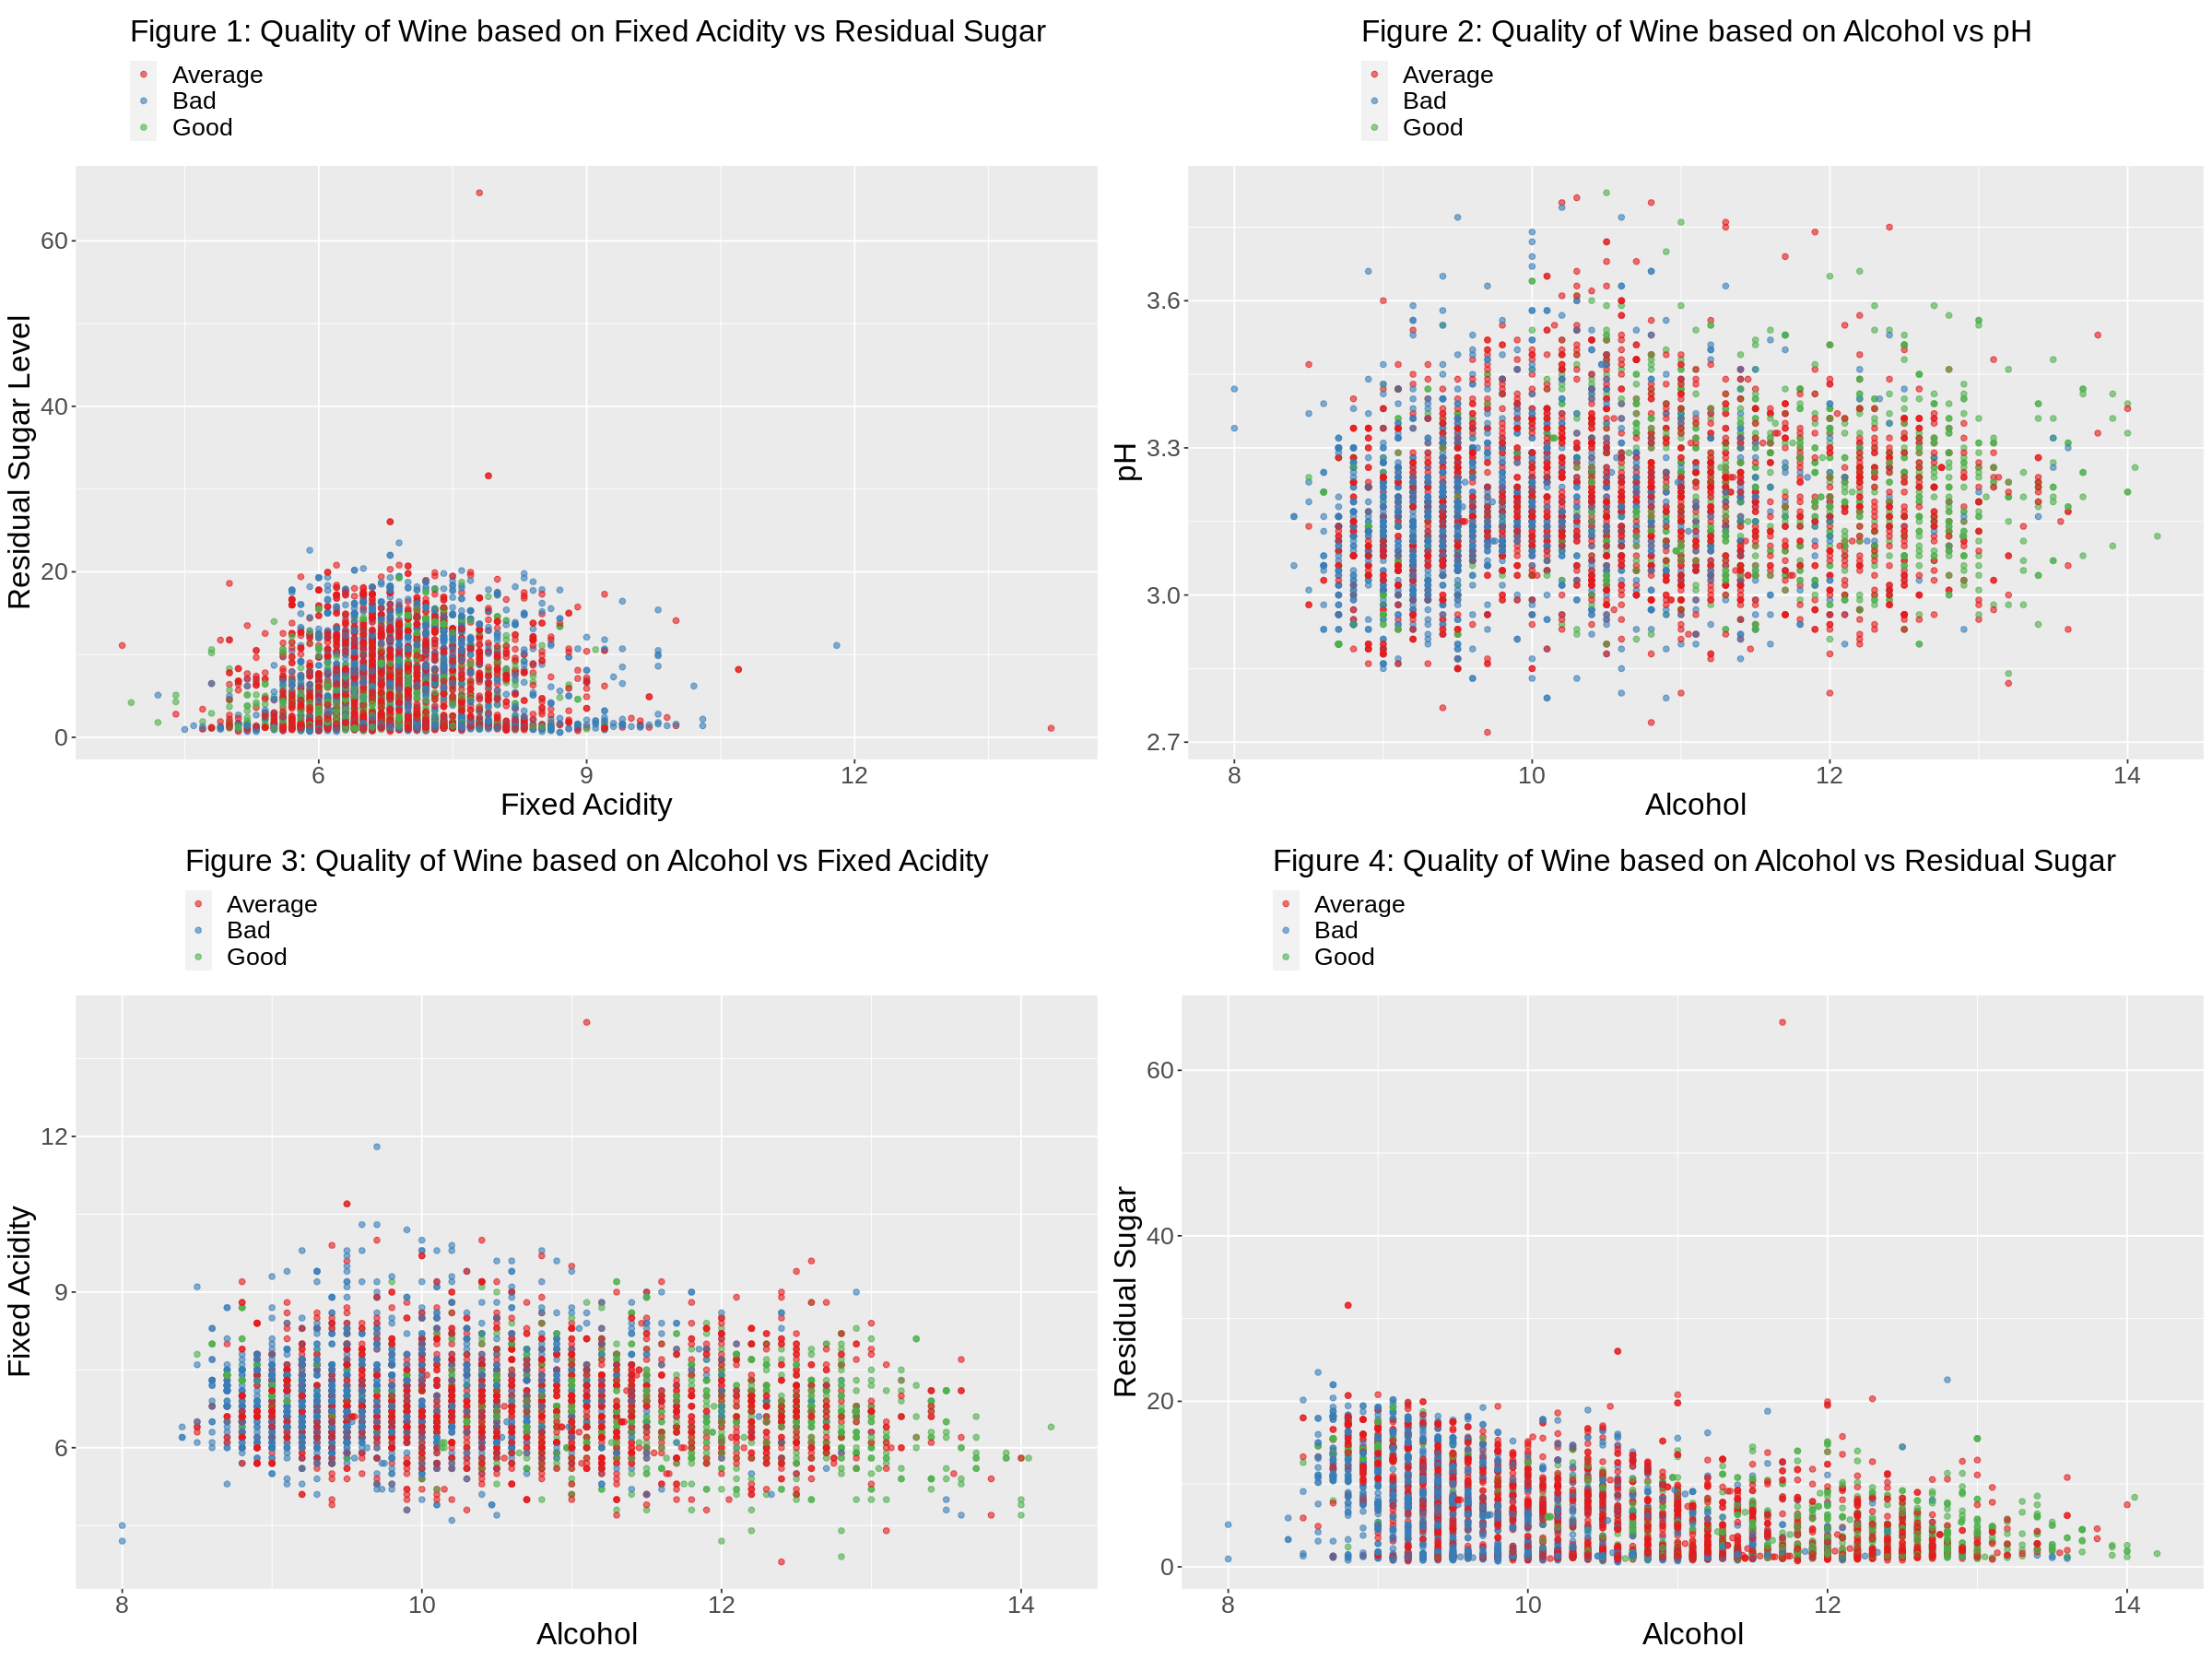

In [4]:
options(repr.plot.width = 20, repr.plot.height = 15)
fixed_vs_sugar <- quality_variables %>%
            ggplot(aes(x = fixed_acid, 
                       y = sugar,
                       color = quality)) +
            geom_point(alpha = 0.6) +
            labs(x = "Fixed Acidity", 
                 y = "Residual Sugar Level",
                 color = "Figure 1: Quality of Wine based on Fixed Acidity vs Residual Sugar") +
            theme(text = element_text(size = 20), legend.position = "top", legend.direction = "vertical") +
            scale_color_brewer(palette = "Set1")

alc_vs_pH <- quality_variables %>%
            ggplot(aes(x = alcohol, 
                       y = pH,
                       color = quality)) +
            geom_point(alpha = 0.6) +
            labs(x = "Alcohol", 
                 y = "pH",
                 color = "Figure 2: Quality of Wine based on Alcohol vs pH") +
            theme(text = element_text(size = 20), legend.position = "top", legend.direction = "vertical") +
            scale_color_brewer(palette = "Set1")

alc_vs_fixed <- quality_variables %>%
            ggplot(aes(x = alcohol, 
                       y = fixed_acid,
                       color = quality)) +
            geom_point(alpha = 0.6) +
            labs(x = "Alcohol", 
                 y = "Fixed Acidity",
                 color = "Figure 3: Quality of Wine based on Alcohol vs Fixed Acidity") +
            theme(text = element_text(size = 20), legend.position = "top", legend.direction = "vertical") +
            scale_color_brewer(palette = "Set1")

alc_vs_sugar <- quality_variables %>%
            ggplot(aes(x = alcohol, 
                       y = sugar,
                       color = quality)) +
            geom_point(alpha = 0.6) +
            labs(x = "Alcohol", 
                 y = "Residual Sugar",
                 color = "Figure 4: Quality of Wine based on Alcohol vs Residual Sugar") +
            theme(text = element_text(size = 20), legend.position = "top", legend.direction = "vertical") +
            scale_color_brewer(palette = "Set1")

plot_grid(fixed_vs_sugar, alc_vs_pH, alc_vs_fixed, alc_vs_sugar, ncol=2)

#### Table 3: Train the classifier, predict the labels in the test set, compute the accuracy

Looking at the value of the .estimate variable shows that the estimated accuracy of the classifier on the test data was 57%.

In [5]:
wine_recipe <- recipe(quality ~ alcohol + sugar, data = quality_variables) %>%
        step_scale(all_predictors()) %>%
        step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
        set_engine("kknn") %>%
        set_mode("classification")

knn_fit <- workflow() %>%
        add_recipe(wine_recipe) %>%
        add_model(knn_spec) %>%
        fit(data = wine_train)

knn_fit

wine_test_predictions <- predict(knn_fit, wine_test) %>%
  bind_cols(wine_test) %>%
  metrics(truth = quality, estimate = .pred_class) %>%
  filter(.metric == "accuracy")

wine_test_predictions

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3887187
Best kernel: rectangular
Best k: 3

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5806122


#### Critically analyze performance and tuning the classifier

In [6]:
wine_split <- initial_split(wine_train, prop = 0.8, strata = quality)
wine_subtrain <- training(wine_split)
wine_validation <- testing(wine_split)

wine_recipe <- recipe(quality ~ alcohol + sugar, data = quality_variables) %>%
        step_scale(all_predictors()) %>%
        step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
        set_engine("kknn") %>%
        set_mode("classification")

knn_fit <- workflow() %>%
        add_recipe(wine_recipe) %>%
        add_model(knn_spec) %>%
        fit(data = wine_subtrain)

validation_predicted <- predict(knn_fit, wine_validation) %>%
            bind_cols(wine_validation)

# compute the accuracy
acc <- validation_predicted %>%
  metrics(truth = quality, estimate = .pred_class) %>%
  filter(.metric == "accuracy") %>%
  select(.estimate) %>%
  pull()

acc

[1] 0.5477707

#### Table 4: Cross-validation

Using 10-fold cross-validation, we have estimated that the prediction accuracy of our classifier is somewhere around 55%.

In [7]:
wine_vfold <- vfold_cv(wine_train, v = 10, strata = quality)

# recreate the standardization recipe from before 
# (since it must be based on the training data)
wine_recipe <- recipe(quality ~ alcohol + sugar, data = wine_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

# fit the knn model (we can reuse the old knn_spec model from before)
knn_fit <- workflow() %>%
  add_recipe(wine_recipe) %>%
  add_model(knn_spec) %>%
  fit_resamples(resamples = wine_vfold)

knn_fit %>% 
  collect_metrics() 

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,multiclass,0.5487484,10,0.005727941,Preprocessor1_Model1
roc_auc,hand_till,0.7185725,10,0.004509505,Preprocessor1_Model1


#### Table 5: Parameter value selection 

In [8]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 5))

knn_results <- workflow() %>%
  add_recipe(wine_recipe) %>%
  add_model(knn_spec) %>%
  tune_grid(resamples = wine_vfold, grid = k_vals) %>%
  collect_metrics() 

accuracies <- knn_results %>%
  filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.5709411,10,0.004404611,Preprocessor1_Model01
6,accuracy,multiclass,0.5464452,10,0.006670540,Preprocessor1_Model02
11,accuracy,multiclass,0.5385331,10,0.008357492,Preprocessor1_Model03
16,accuracy,multiclass,0.5288190,10,0.008101985,Preprocessor1_Model04
21,accuracy,multiclass,0.5382858,10,0.005975511,Preprocessor1_Model05
26,accuracy,multiclass,0.5311429,10,0.003866713,Preprocessor1_Model06
31,accuracy,multiclass,0.5273215,10,0.004811290,Preprocessor1_Model07
36,accuracy,multiclass,0.5301218,10,0.005918849,Preprocessor1_Model08
41,accuracy,multiclass,0.5314065,10,0.007083771,Preprocessor1_Model09


#### Figure 5: Plot of estimated accuracy versus the number of neighbors.

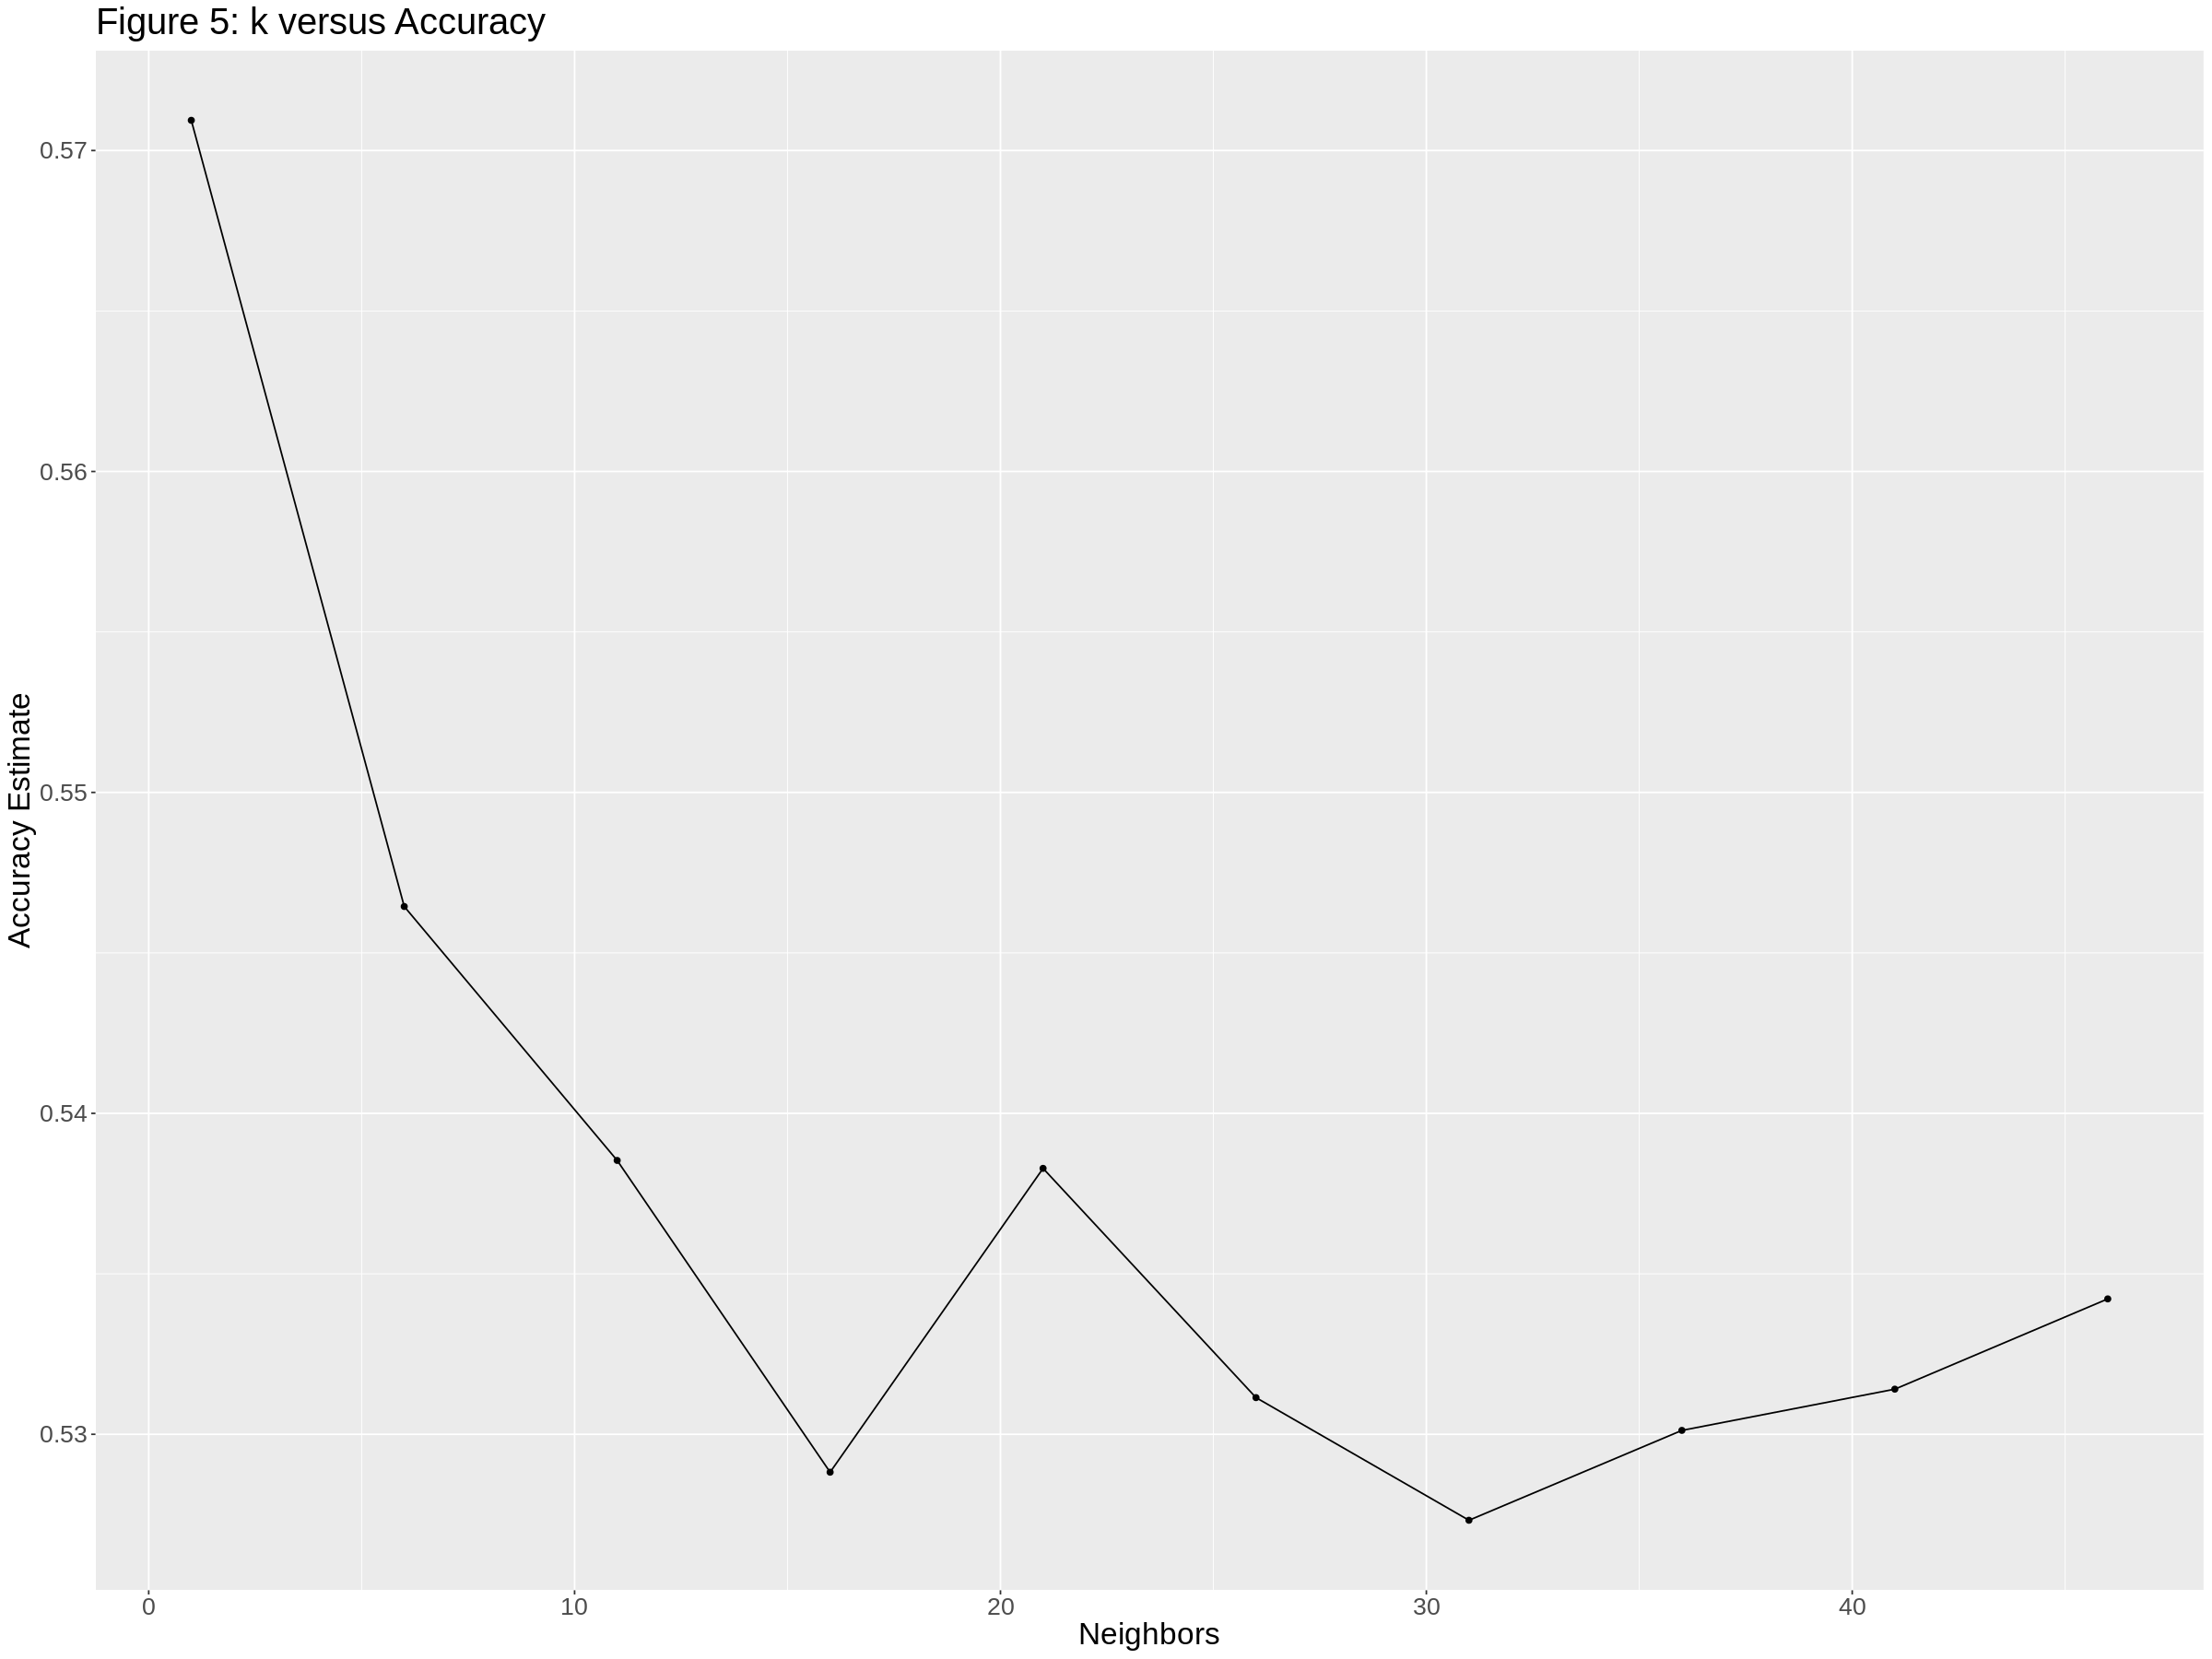

In [9]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  ggtitle("Figure 5: k versus Accuracy")+
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 20))

accuracy_vs_k

Setting the number of neighbors to K = 3 provides the highest accuracy (up to 57%). The values you see on this plot are estimates of the true accuracy of our classifier. 

#### Plot of accuracy estimate versus number of neighbors for many K values.

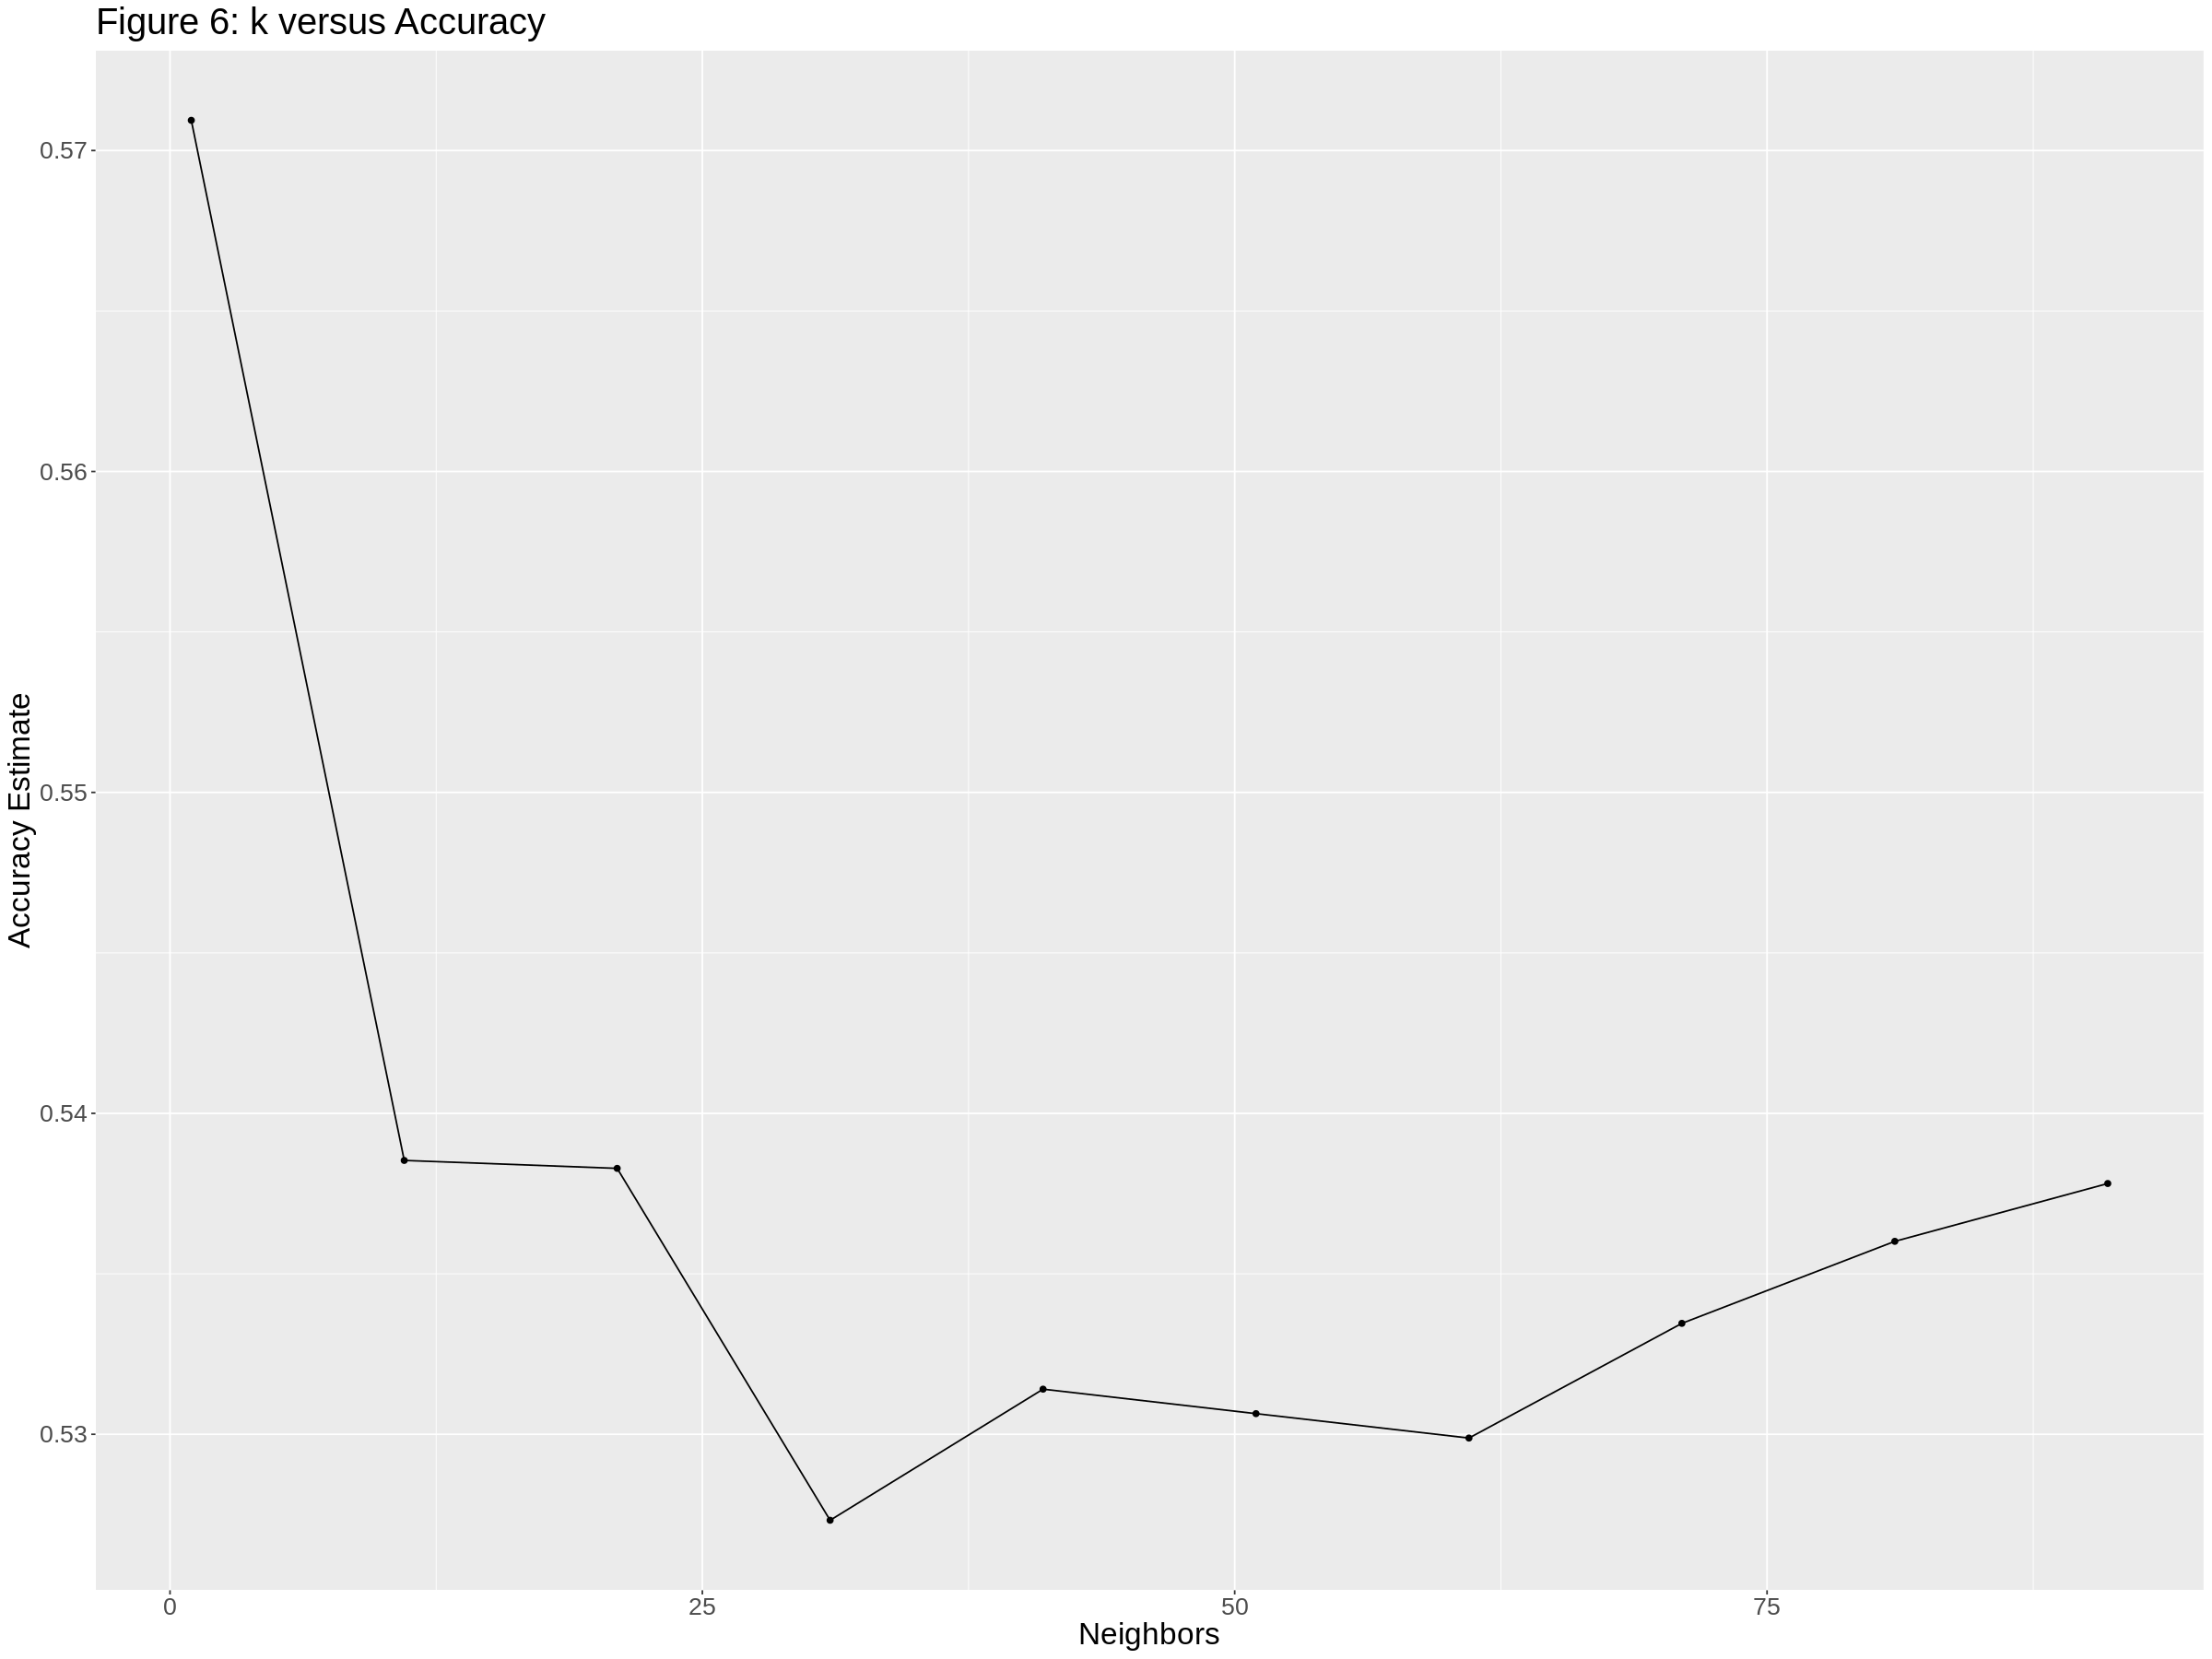

In [10]:
k_lots <- tibble(neighbors = seq(from = 1, to = 100, by = 10))

knn_results <- workflow() %>%
  add_recipe(wine_recipe) %>%
  add_model(knn_spec) %>%
  tune_grid(resamples = wine_vfold, grid = k_lots) %>%
  collect_metrics()

accuracies <- knn_results %>%
  filter(.metric == "accuracy")

accuracy_vs_k_lots <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  ggtitle("Figure 6: k versus Accuracy")+
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 20))

accuracy_vs_k_lots

Increasing the number of k-values has no significant change on the accuracy estimates.

## Discussion

#### Summary
Our results suggest that there is a weak correlation between our predictors (fixed acidity, residual sugar, alcohol, pH) and the quality of the wine. From the plots in figure 1-4, a weak positive relationship between wine quality and % alcohol content can be observed. This can be seen in Figure 2: Quality of Wine based on Alcohol vs pH, where the majority of green data points (representing good quality wine) are found on the right side of the graph, where high % alcohol values are found ranging from 12-13. 
On the other hand, the majority of “bad” quality data points (in blue) are clustered around low % alcohol content values (~9-10%). However, these trends are not significant enough to be considered a proper relationship between wine quality and the chosen predictors. We chose k = 3 neighbours because from Graph 5, it can be seen that a K value of 3 is the optimal K value that will produce the highest accuracy estimate using the lowest number of neighbours. The final accuracy of the model as indicated by Table 4 is approximately 55%. For a KNN Classification model, this is considered a low accuracy. Since the KNN Classification analysis was performed properly, the low accuracy likely stems from the fact that the Classification model cannot find a strong correlation between the predictors and the item we are trying to predict (wine quality) from the data used to fit the model, i.e. the data related to quality is too subjective. 


#### Expectation
We expected to find some relationship between our predictors (fixed-acid, sugar, alcohol, pH) and the quality of the wine, however the results of our analysis suggest that it is extremely weak. This is likely due to limitations of our chosen dataset. It’s not as much of an issue related to the number of data available, but rather that the data itself represents an uncorrelated trend.


#### Impacts
Our findings suggest that a physicochemical analysis is not the best method to determine the quality of wine. This is useful information for data scientists as they now know to evaluate wine quality using other predictors, or to make changes to the current method of collecting physicochemical data on wine quality. Other researchers such as Hopfer and Heymann (2014) suggest "intrinsic dimensions" such as pleasure, aroma, flavour, mouthfeel and appearance of wine can impact individuals subjective preferences, which suggests that data related to drinking experiences can be better predictors of quality.


#### Future Questions
Since it was found that our predictors were not useful in predicting wine quality, the next step is to conduct further analysis on whether any of the remaining (untested) physicochemical properties of wine are suitable predictors of wine quality. It may be worth considering non-physicochemical properties such as the ones mentioned by JJ Buckley Fine Wines, in which their article suggests that environmental factors such as climate, temperature and sunlight may also have an effect on the resulting quality of wine (JJ Buckley Fine Wines, n.d.). 

Additionally, the process of evaluating wine quality is subjective and often relies on qualitative analysis. As a paper by Paulo Cortez and co. wrote, physicochemical tests are performed in a laboratory while sensory tests “rely mainly on human experts” (Paulo Cortez, 2009). Since sensory tests do not follow any scientific basis, it is worth considering whether an analytical approach is even suitable for determining the quality of wine in the first place. Overall, we can conclude that there are limits to modelling subjective preferences because the results are not always rational.


## *Refrences*

Hopfer, H., & Heymann, H. (2014). Judging wine quality: Do we need experts, consumers or trained panelists? *Food Quality and Preference, 32*, 221–233. https://doi.org/10.1016/j.foodqual.2013.10.004

The 4 factors and 4 indicators of Wine Quality. *JJ Buckley Fine Wines*. (n.d.). Retrieved December 7, 2022, from https://www.jjbuckley.com/wine-knowledge/blog/the-4-factors-and-4-indicators-of-wine-quality/1009

Paulo Cortez, A. C. (2009, May 16). *Modeling wine preferences by data mining from physicochemical properties*. Retrieved from ScienceDirect: https://www.sciencedirect.com/science/article/pii/S0167923609001377

UCI Machine Learning Repository: *Wine quality data set*. (n.d.). Retrieved December 7, 2022, from https://archive.ics.uci.edu/ml/datasets/wine+quality  
